In [89]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#plt.style.use('ggplot')
%precision 4
#np.set_printoptions(suppress=True)

from scipy import optimize, interpolate, stats

1. Maximum wind speed prediction at the Sprogø station

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark.

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability 
 for a given year i is defined as 
 with 
, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
Compute then the cumulative probability 
 (cprob) and sort the maximum speeds from the data. Use then the UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

fifty_prob = 1. - 0.02
So the storm wind speed occurring every 50 years can be guessed as:

fifty_wind = quantile_func(fifty_prob)

max estimated wind speed in 50 years = 32.97989844019469


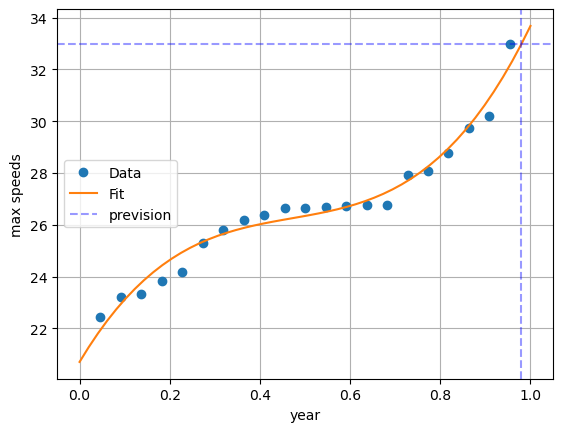

In [16]:
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
max_speeds.sort()
p = [i/(years_nb+1) for i in range(1, years_nb+1)]
inter = interpolate.UnivariateSpline(p, max_speeds)
# inter.set_smoothing_factor(0.2)
plt.plot(p, max_speeds, 'o', label='Data')
x = np.linspace(0, 1, 50)
plt.plot(x, inter(x), label="Fit")

fifty_prob = 1 - 0.02
fifty_wind = inter(fifty_prob)
plt.axvline(fifty_prob, color='b', alpha=0.4, ls='--')
plt.axhline(fifty_wind, color='b', alpha=0.4, ls='--', label='prevision')
print('max estimated wind speed in 50 years =', fifty_wind)

plt.ylabel('max speeds')
plt.xlabel('year')
plt.grid()
plt.legend(loc='best')
plt.show()

2. Curve fitting of temperature in Alaska

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max: 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

Plot these temperature extremes.
Define a function that can describe min and max temperatures.
Fit this function to the data with scipy.optimize.curve_fit().
Plot the result. Is the fit reasonable? If not, why?
Is the time offset for min and max temperatures the same within the fit accuracy?

Max fit params: [ 6.7358  2.2944 23.0921 15.7793]
Max fit covariance matrix:
 [[ 6.3151e-03 -2.1218e-04 -1.6038e-03  1.9160e-03]
 [-2.1218e-04  2.7542e-02  1.0146e-01 -1.7091e-01]
 [-1.6038e-03  1.0146e-01  1.3286e+00 -1.0833e+00]
 [ 1.9160e-03 -1.7091e-01 -1.0833e+00  1.3842e+00]]
Min fit params: [  7.1645   1.9759  52.6493 -61.3209]
Min fit covariance matrix:
 [[ 2.2285e-03 -4.9258e-05 -8.7354e-04  1.0911e-03]
 [-4.9258e-05  5.7733e-03  2.2719e-02 -7.0653e-02]
 [-8.7354e-04  2.2719e-02  1.9694e+00 -1.0513e+00]
 [ 1.0911e-03 -7.0653e-02 -1.0513e+00  1.4133e+00]]


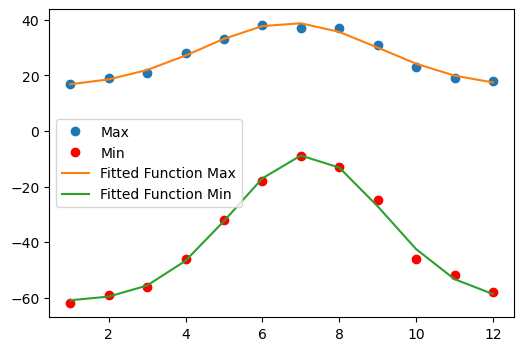

In [7]:
maxes = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
mins = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.linspace(1, 12, 12)

plt.figure(figsize=(6, 4))
plt.plot(months, maxes, 'o', ms=6, label='Max')
plt.plot(months, mins, 'ro', label='Min')

def func(x, mean, std, C, offset):
    return C*np.exp(-(((x-mean)/std)**2)/2) + offset

paramsMAX, params_covarianceMAX = optimize.curve_fit(func, months, maxes, p0=[6.7, 1.5, 20, 20])
paramsMIN, params_covarianceMIN = optimize.curve_fit(func, months, mins, p0=[6.5, 1.5, 20, -50])
print("Max fit params:", paramsMAX)
print("Max fit covariance matrix:\n", params_covarianceMAX)
print("Min fit params:", paramsMIN)
print("Min fit covariance matrix:\n", params_covarianceMIN)

plt.plot(months, func(months, paramsMAX[0], paramsMAX[1], paramsMAX[2], paramsMAX[3]), label="Fitted Function Max")
plt.plot(months, func(months, paramsMIN[0], paramsMIN[1], paramsMIN[2], paramsMIN[3]), label="Fitted Function Min")

plt.legend(loc='best');

In [19]:
print("The fit is reasonable: we can see a good gaussian fit.")
print(f"The time offset is not that good for both temperatures: \nwe estimate for maxes: t_mean = ({paramsMAX[0]}+-{(np.diag(params_covarianceMAX)**0.5)[0]})")
print(f"and for mins: t_mean = ({paramsMIN[0]} +- {(np.diag(params_covarianceMIN)**0.5)[0]})")
print(f"They are incompatible: r = {np.abs(paramsMAX[0]-paramsMIN[0])/np.sqrt(np.diag(params_covarianceMIN)[0]+np.diag(params_covarianceMAX)[0])}")

print(f"Results on t student test: = {stats.ttest_ind(maxes, mins)}")

The fit is reasonable: we can see a good gaussian fit.
The time offset is not that good for both temperatures: 
we estimate for maxes: t_mean = (6.735816963668242+-0.07946756700189322)
and for mins: t_mean = (7.1645258584082585 +- 0.047207055402383506)
They are incompatible: r = 4.6381205628284174
Results on t student test: = Ttest_indResult(statistic=10.97184688722018, pvalue=2.175972509181154e-10)


3. 2D minimization of a six-hump camelback function

 
has multiple global and local minima. Find the global minima of this function.

Hints:

Variables can be restricted to 
 and 
.
Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
Use scipy.optimize.minimize(), optionally trying out several of its methods.
How many global minima are there, and what is the function value at those points? What happens for an initial guess of 
 ?

[ 0.0898 -0.7127] -1.0316284534897933
[-0.0898  0.7127] -1.0316284534898


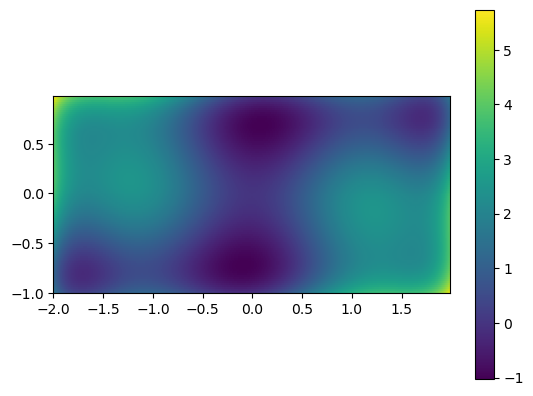

In [90]:
def f(z):
    x, y = z
    return (4 - 2.1*x**2 + x**4/3)*x**2 + x*y + + (4*y**2 - 4 )*y**2

x_grid = np.arange(-2, 2, 0.01)
y_grid = np.arange(-1, 1, 0.02)
grid = np.meshgrid(x_grid, y_grid)
extent = np.min(x_grid), np.max(x_grid), np.min(y_grid), np.max(y_grid)
Z = f(grid)
Im1 = plt.imshow(Z, extent=extent, interpolation="none")
plt.colorbar()

x0 = [0,-0.75]
res = optimize.minimize(f, x0, bounds=((-2, 2), (-1, 1)))
print(res.x, f(res.x))

x0 = [0,0.75]
res = optimize.minimize(f, x0, bounds=((-2, 2), (-1, 1)))
print(res.x, f(res.x))


Performe a periodicity analysis on the lynxs-hares population

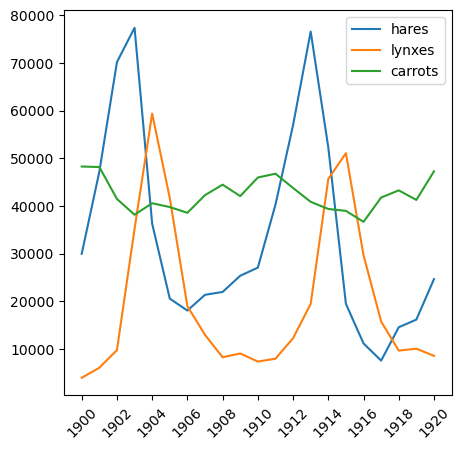

In [23]:
from scipy import fftpack
content = np.loadtxt('populations.txt')
years = content[:, 0].astype(int)
species = {
  "hares": content[:, 1],
  "lynxes": content[:, 2],
  "carrots": content[:, 3] }
species_keys = list(species.keys())

# plot the populations
plt.figure(figsize=(5, 5))
plt.plot(years, species['hares'], label='hares')
plt.plot(years, species['lynxes'], label='lynxes')
plt.plot(years, species['carrots'], label='carrots')
plt.xticks(years[::2], rotation=45)
plt.legend(loc="upper right")
plt.show()

In [24]:
# To determine the period, lets compute a 1D FFT of both lynxes and hares
sig_fft_lynx = fftpack.fft(species['lynxes'])
sig_fft_hares = fftpack.fft(species['hares'])

# And the power (sig_fft is of complex dtype)
power_lynx = np.abs(sig_fft_lynx)
power_hares = np.abs(sig_fft_hares)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig_fft_hares.size)

# find peak freq
freqs_hares = sample_freq[sample_freq > 0]
freqs_lynx = sample_freq[sample_freq > 0]
peak_freq_hares = freqs_hares[power_hares[sample_freq > 0].argmax()]
peak_freq_lynx = freqs_lynx[power_lynx[sample_freq > 0].argmax()]

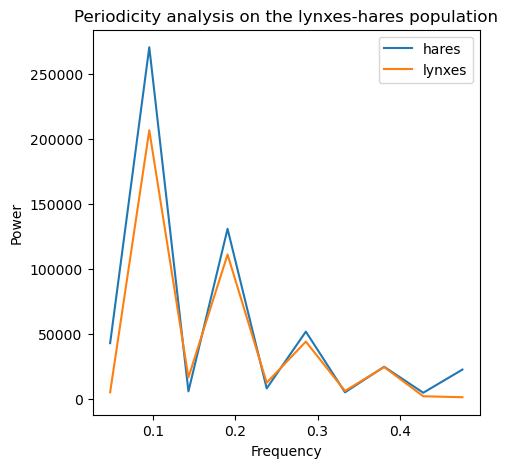

 hares freq: 0.09523809523809523 1/year
 -> hares period: 10.5 years
 lynxes freq: 0.09523809523809523 1/year
 -> lynxes period: 10.5 years


In [40]:
# Plot both 

plt.figure(figsize=(5, 5))
plt.plot(freqs_hares, power_hares[sample_freq > 0], label='hares')
plt.plot(freqs_lynx, power_lynx[sample_freq > 0], label='lynxes')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc="upper right")
plt.title("Periodicity analysis on the lynxes-hares population")
plt.show()

print(f' hares freq: {peak_freq_hares} 1/year')
print(f' -> hares period: {1/peak_freq_hares} years')
print(f' lynxes freq: {peak_freq_lynx} 1/year')
print(f' -> lynxes period: {1/peak_freq_lynx} years')

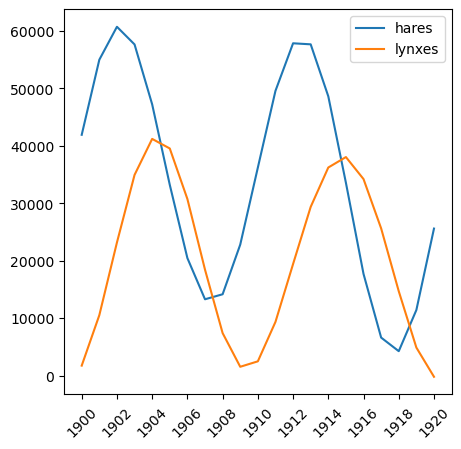

In [71]:
#make a low pass filter
low_freq_hares = sig_fft_hares.copy()
low_freq_lynx = sig_fft_lynx.copy()
low_freq_hares[np.abs(sample_freq) > 0.15] = 0
low_freq_lynx[np.abs(sample_freq) > 0.15] = 0
filter_hares = np.real(fftpack.ifft(low_freq_hares))
filter_lynx = np.real(fftpack.ifft(low_freq_lynx))
plt.figure(figsize=(5, 5))
plt.plot(years, filter_hares, label='hares')
plt.plot(years, filter_lynx, label='lynxes')
plt.xticks(years[::2], rotation=45)
plt.legend(loc="upper right")
plt.show()

5. FFT of an image

Examine the provided image moonlanding.png, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
Load the image using pylab.imread().
Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
Apply the inverse Fourier transform to see the resulting image.

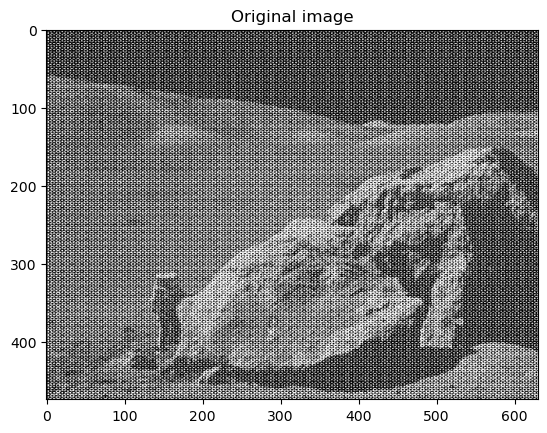

Text(0.5, 1.0, 'Fourier transform')

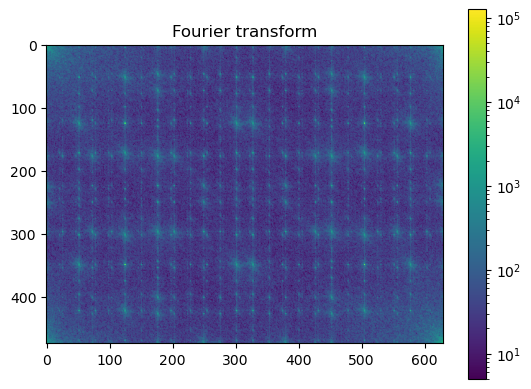

In [45]:
image = plt.imread("moonlanding.png")
plt.imshow(image, plt.cm.gray)
plt.title("Original image")
plt.show()

spectrum = fftpack.fft2(image)
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(spectrum), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(spectrum)
plt.title('Fourier transform')

(474, 630)


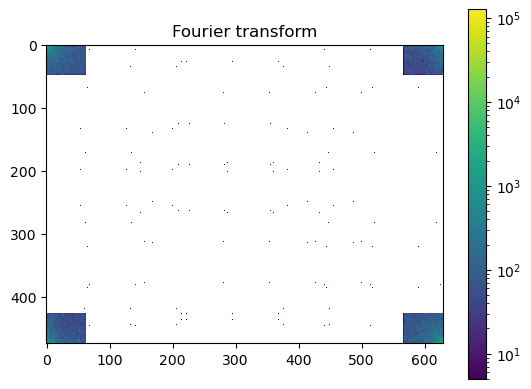

Text(0.5, 1.0, 'Filtered image')

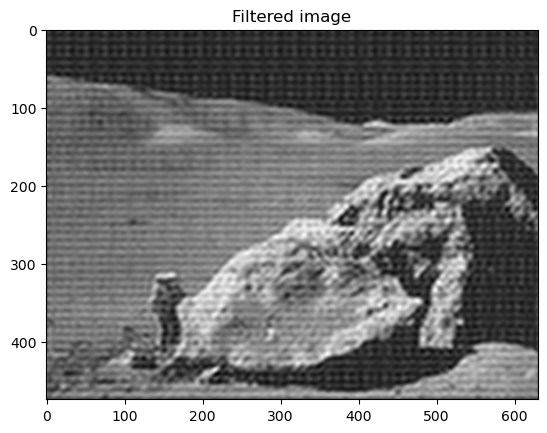

In [88]:
hfreq = spectrum.copy()
frows = fftpack.fftfreq(hfreq.shape[0])
fcols = fftpack.fftfreq(hfreq.shape[1])
print(hfreq.shape)
frac = 0.2
hfreq[np.abs(frows) > frows.max()*frac] = 0
for h in hfreq:
    h[np.abs(fcols) > fcols.max()*frac] = 0
    
plot_spectrum(hfreq)
plt.title('Fourier transform')
plt.show()

filtered_img = fftpack.ifft2(hfreq).real
plt.figure()
plt.imshow(filtered_img, plt.cm.gray)
plt.title("Filtered image")